In [ ]:
import os

In [ ]:
os.environ['KAGGLE_USERNAME'] = 'brainmentors'
os.environ['KAGGLE_KEY'] = '854258f0a96411cb66c4ca9ddc3fe5dc'

!kaggle datasets download -d paultimothymooney/chest-xray-pneumonia

100% 2.29G/2.29G [00:28<00:00, 29.8MB/s]
100% 2.29G/2.29G [00:28<00:00, 85.8MB/s]


In [ ]:
!unzip chest-xray-pneumonia.zip

Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
len(os.listdir('chest_xray/train/NORMAL/'))

1341

In [ ]:
len(os.listdir('chest_xray/train/PNEUMONIA/'))

3875

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
train_path = "chest_xray/train/"
test_path = "chest_xray/test/"

In [ ]:
def load_data(path):
  features = []
  labels = []
  dirs = os.listdir(path)
  for i, dir in enumerate(dirs):
    images = os.listdir(path + "/" + dir)
    for img in images:
      try:
        img_path = path + "/" + dir + "/" + img
        image = cv2.imread(img_path)
        image = cv2.resize(image, (224,224))
        features.append(image)
        labels.append(i)
      except BaseException as ex:
        print("Unable to load",img_path)

  return features, labels

In [ ]:
train_images, train_labels = load_data(train_path)

In [ ]:
len(train_images)

5216

In [ ]:
# train_images[0]

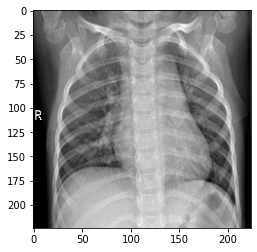

In [ ]:
plt.imshow(train_images[0])

In [ ]:
np.unique(train_labels, return_counts=True)

(array([0, 1]), array([1341, 3875]))

In [ ]:
test_images, test_labels = load_data(test_path)

In [ ]:
train_images = np.asarray(train_images)
test_images = np.asarray(test_images)

In [ ]:
train_images = train_images / 255.0
test_images = test_images / 255.0

In [ ]:
train_labels = np.asarray(train_labels)
test_labels = np.asarray(test_labels)

In [ ]:
train_labels.shape

(5216,)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import  Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
model = Sequential()

model.add(Conv2D(filters=96, kernel_size=(11,11), strides=4, padding='same',
                 input_shape=(224,224,3), activation='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=2))

model.add(Conv2D(filters=256, kernel_size=(5,5), strides=1, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=2))

model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1, padding='same',
                 activation='relu'))
model.add(Conv2D(filters=384, kernel_size=(3,3), strides=1, padding='same',
                 activation='relu'))
model.add(Conv2D(filters=256, kernel_size=(3,3), strides=1, padding='same',
                 activation='relu'))
model.add(MaxPool2D(pool_size=(3,3), strides=2))

model.add(Flatten())

model.add(Dense(4096, activation='relu'))
model.add(Dense(4096, activation='relu'))

model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 56, 56, 96)        34944     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 27, 27, 96)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 27, 27, 256)       614656    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 13, 13, 256)       0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 13, 13, 384)       885120    
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 13, 13, 384)       1327488   
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 13, 13, 256)       8

In [ ]:
model.compile(optimizer='adam', loss=tf.keras.losses.categorical_crossentropy,
              metrics=['accuracy'])

In [ ]:
model.fit(train_images, train_labels, epochs=5, validation_data=(test_images, test_labels))

Epoch 1/5
163/163 [==============================] - 851s 5s/step - loss: 0.0000e+00 - accuracy: 0.2571 - val_loss: 0.0000e+00 - val_accuracy: 0.3750
Epoch 2/5
163/163 [==============================] - 844s 5s/step - loss: nan - accuracy: 0.2571 - val_loss: nan - val_accuracy: 0.3750
Epoch 3/5
163/163 [==============================] - 828s 5s/step - loss: nan - accuracy: 0.2571 - val_loss: nan - val_accuracy: 0.3750
Epoch 4/5
163/163 [==============================] - 816s 5s/step - loss: nan - accuracy: 0.2571 - val_loss: nan - val_accuracy: 0.3750
Epoch 5/5
 53/163 [========>.....................] - ETA: 8:54 - loss: nan - accuracy: 0.2524